# Arxiv Keyword Analysis

This document is an example how to perform keyword analysis on more than 1 milliion arxiv.org papers metadata (https://arxiv.org). For a way how to download all metadata, please see [link here]. In this exercise we want to count all papers per year.  

In [4]:
# import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from flashtext.keyword import KeywordProcessor

# pip install flashtext

In [5]:
# default_path = r'C:\Users\user\Downloads\arxivdata'
default_path = r'C:\Users\user\SciFiLab\data'
os.chdir(default_path)

# import all metadata

In [6]:
# import first metadata file
df = pd.read_json("arxiv_dataset_cleaned_large.json")
df

,abstract,arxivid,creator,date,date_first,description,identifier,info,language,subject,title,type
0,A fully differential calculation in perturba...,704,"[Balázs, C., Berger, E. L., Nadolsky, P. M., Y...","[2007-04-02, 2007-07-24]",2007-04-02,[ A fully differential calculation in perturb...,"[http://arxiv.org/abs/0704.0001, Phys.Rev.D76:...","Comment: 37 pages, 15 figures; published version",,[High Energy Physics - Phenomenology],Calculation of prompt diphoton production cros...,text
1,"We describe a new algorithm, the $(k,\ell)$-...",704,"[Streinu, Ileana, Theran, Louis]","[2007-03-30, 2008-12-13]",2007-03-30,"[ We describe a new algorithm, the $(k,\ell)$...",[http://arxiv.org/abs/0704.0002],Comment: To appear in Graphs and Combinatorics,,"[Mathematics - Combinatorics, Computer Science...",Sparsity-certifying Graph Decompositions,text
10,In this paper we present an algorithm for co...,704.001,"[Cunningham, Clifton, Dembele, Lassina]","[2007-03-31, 2008-08-20]",2007-03-31,[ In this paper we present an algorithm for c...,[http://arxiv.org/abs/0704.0011],Comment: 14 pages; title changed; to appear in...,,"[Mathematics - Number Theory, Mathematics - Al...",Computing genus 2 Hilbert-Siegel modular forms...,text
100,In this contribution we go through the devel...,704.01,"[Di Vecchia, Paolo]",[2007-04-01],2007-04-01,[ In this contribution we go through the deve...,"[http://arxiv.org/abs/0704.0101, Lect.NotesPhy...","Comment: Latex 60 pages, 2 figures, uses svmul...",,[High Energy Physics - Theory],The birth of string theory,text
1000,We propose a Hodge field theory construction...,704.1,"[Losev, A., Shadrin, S., Shneiberg, I.]",[2007-04-07],2007-04-07,[ We propose a Hodge field theory constructio...,"[http://arxiv.org/abs/0704.1001, Nucl. Phys. B...",Comment: 35 pages,,"[Mathematics - Quantum Algebra, Mathematics - ...",Tautological relations in Hodge field theory,text
10000,"A precise determination, and comparison, of ...",706.131,"[Melchiorri, Alessandro, Pagano, Luca, Pandolf...",[2007-06-10],2007-06-10,"[ A precise determination, and comparison, of...","[http://arxiv.org/abs/0706.1314, Phys.Rev.D76:...","Comment: 5 pages, 2 figures",,"[Astrophysics, General Relativity and Quantum ...",When Did Cosmic Acceleration Start ?,text
100000,No-scale supersymmetry or gaugino mediation ...,812.387,"[Evans, Jason L., Morrissey, David E., Wells, ...",[2008-12-19],2008-12-19,[ No-scale supersymmetry or gaugino mediation...,"[http://arxiv.org/abs/0812.3874, Phys.Rev.D80:...","Comment: 18 Pages, 5 Figures",,[High Energy Physics - Phenomenology],Vacuum Stability with Tachyonic Boundary Higgs...,text
1000000,We propose a model that can account for the ...,cond-mat/0402309,"[Lukatsky, D. B., Frenkel, Daan]",[2004-02-11],2004-02-11,[ We propose a model that can account for the...,"[http://arxiv.org/abs/cond-mat/0402309, Phys. ...",,,"[Condensed Matter - Soft Condensed Matter, Con...",Phase Behavior and Selectivity of DNA-linked N...,text
1000001,We present here new evidence that after a qu...,cond-mat/0402310,"[de Oliveira, Mario J., Petri, Alberto, Tome, ...",[2004-02-11],2004-02-11,[ We present here new evidence that after a q...,"[http://arxiv.org/abs/cond-mat/0402310, Physic...",Comment: 7 pages with 5 figures,,"[Condensed Matter - Statistical Mechanics, Con...",Crystal vs glass formation in lattice models w...,text
1000002,We present an exact functional formalism to ...,cond-mat/0402311,"[Budini, A. A., Caceres, M. O.]",[2004-02-11],2004-02-11,[ We present an exact functional formalism to...,"[http://arxiv.org/abs/cond-mat/0402311, doi:10...",,,"[Condensed Matter - Other Condensed Matter, Co...",Functional characterization of generalized Lan...,text


In [5]:
# default_path = r'C:\Users\user\Downloads\arxivdata'
# os.chdir(default_path)

# # import first metadata file
# df0 = pd.read_json("metadata_arxiv_0000.txt")
# df0

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Downloads\\arxivdata'

In [119]:
# # extract year from 'date' column - will need later
# dfall = df0[['title', 'description', 'date']]
# allfiles = 521
# for i in range(1, allfiles):
# #     print("metadata_arxiv_%04d.txt" % i)
#     df = pd.read_json("metadata_arxiv_%04d.txt" % i)
#     dftemp = df[['title', 'description', 'date']]
#     dfall = dfall.append(df)
    
# # reset index
# dfall.reset_index(drop=True)

KeyboardInterrupt: 

In [9]:
allpapers = df.shape[0]
allpapers

1302501

In [10]:
dates = df['date']

In [13]:
allyears = []
# loop over all papers (yes all!) and get year in array
for i in range(0, allpapers):
    # strip year out from date
    year = str.split(dates.iloc[i][0],'-')[0]
    
    if year:
        allyears.append(year)
    else:
        allyears.append(None)
len(allyears)

1302501

In [14]:
# get all years available
uniqueyears = set(allyears)
uniqueyears

{'1986',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017'}

In [71]:
# create pd series
# dfyears = pd.DataFrame(pd.to_numeric(allyears), columns=['year'])

In [22]:
df['abstract'][0]

'  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes at the LHC, showing\nthat enhanced sensitivity to the signal can be obtained with judicious\nselection of events.\n'

In [24]:
# merge title + abstract in dfmerg
dfmerg = df['title'] + df['abstract']
dfmerg.head()

0       Calculation of prompt diphoton production cros...
1       Sparsity-certifying Graph Decompositions  We d...
10      Computing genus 2 Hilbert-Siegel modular forms...
100     The birth of string theory  In this contributi...
1000    Tautological relations in Hodge field theory  ...
dtype: object

In [25]:
keyword_processor = KeywordProcessor()

In [44]:
# define keywords for NVs
keyword_processor = KeywordProcessor()
keywords = {"NV center" : [
    "NV center",
    "NV centre",
    "Nitrogen-Vacancy",
    "Nitrogen Vacancy",
    "N-V",
    "NV defect"
]}
keyword_processor.add_keywords_from_dict(keywords)
sampletext = 'NV center NV centre Nitrogen-Vacancy Nitrogen Vacancy N-V'
keyword_processor.extract_keywords(sampletext)

['NV center', 'NV center', 'NV center', 'NV center', 'NV center']

In [45]:
length = dfmerg.shape[0]
length

1302501

In [46]:
# iterate over all papers (yes all!) and find keywords
# length = 10000
nvpapers = []
for i in range(0, length):
         
    # merge title + abstract to big text
    text = dfmerg.iloc[i]
    # replace linebreak characters
    text = text.replace("\n"," ")
    
    keywords = keyword_processor.extract_keywords(text)
    
#     print(text)
    
#     if i ==100:
#         break
#     # when keywords found, add paper index + year to nvpapers list
    if keywords:
#         print(text)
#         print(keywords)
#         print(allyears[i], i)
        nvpapers.append([i, allyears[i]])
#         break
print("total NV papers: ", len(nvpapers))

total NV papers:  899


In [47]:
# counts papers per year, use numpy.unique
nvpapers = np.array(nvpapers)
values, counts = np.unique(nvpapers[:,1], return_counts=True)
print(values, counts)

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'] [  4   2   1   1   4   7  11  12  17  41  58  64  74 111 125 128 130 109]


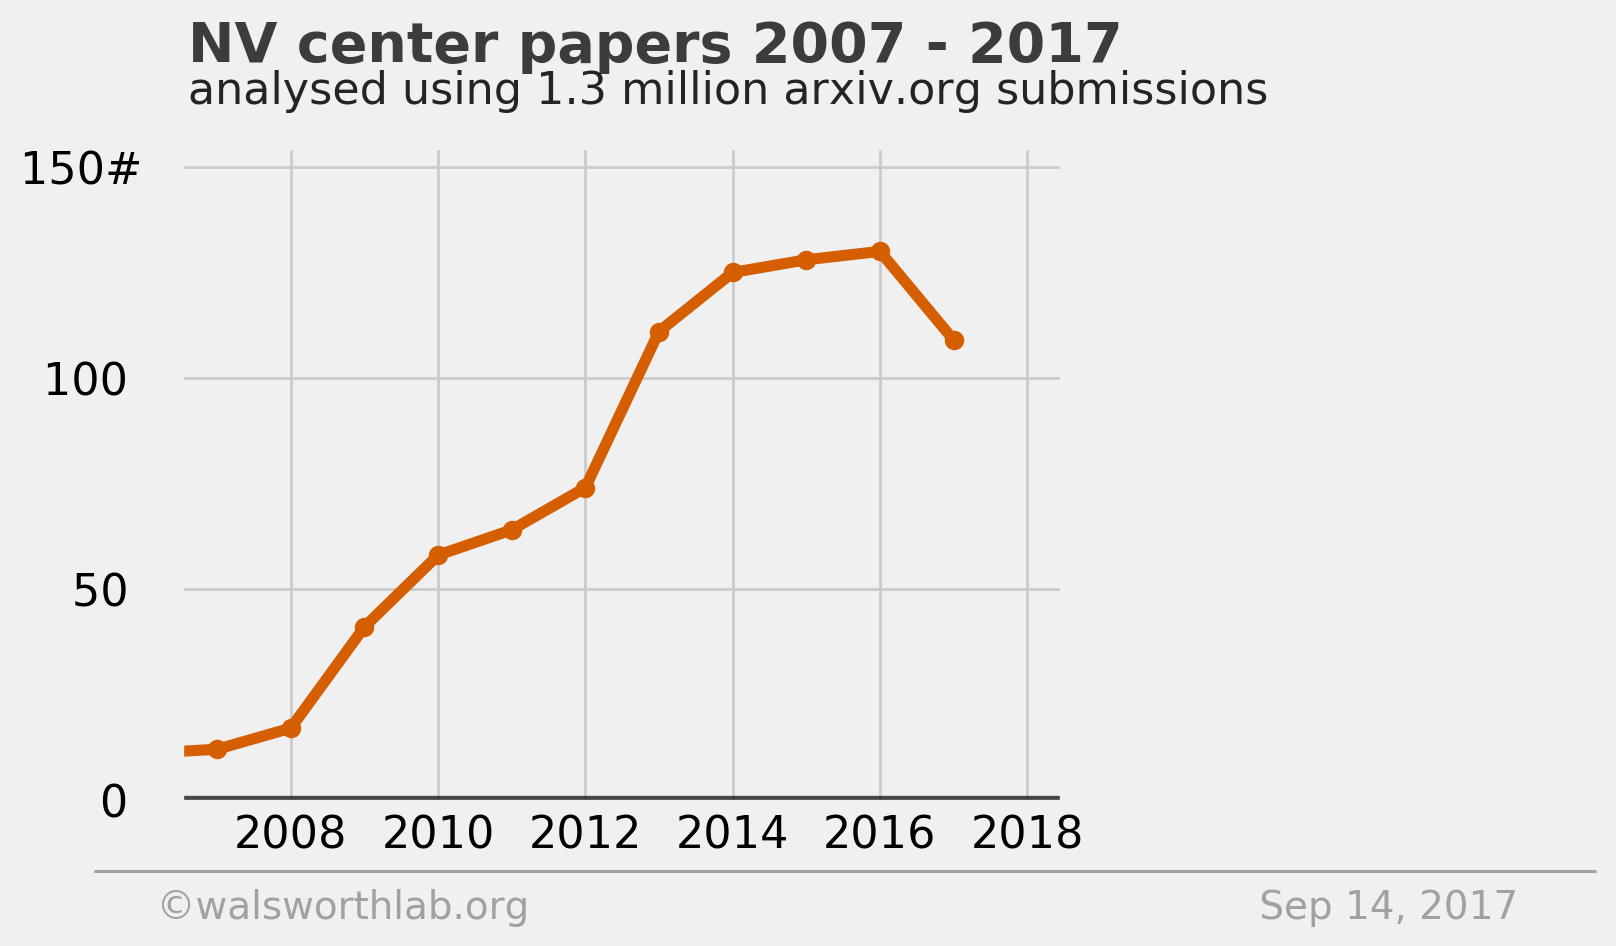

In [50]:
# nice plot style
# see https://www.dataquest.io/blog/making-538-plots/
plt.style.use('fivethirtyeight')

colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]

# need to convert year list to integers list
yearsint = [int(i) for i in uniqueyears]

plt.figure(figsize = (3/2 * 8.6/2.54, 3/2* 4/5 * 8.6/2.54), dpi=200)

plt.plot(values, counts, 'o-', markeredgecolor=None, color= colors[4])

# set ticks
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

# generate a bolded horizontal line at y = 0 
ax.axhline(y = 0, color = 'black', linewidth = 3, alpha = 0.7)

# add an extra vertical line by tweaking the range of the x-axis
plt.xlim([2006.5, 2018.5])

# add title
ax.text(x = 2006.6, y = 175, s = "NV center papers 2007 - 2017",
               fontsize = 20, weight = 'bold', alpha = .75)
ax.text(x = 2006.6, y = 165, 
               s = 'analysed using 1.3 million arxiv.org submissions',
              fontsize = 16, alpha = .85)

#
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

# plt.xticks([0, 50, 100, 150, ])

ax.set_yticklabels(labels = ['0   ', '50   ', '100   ', '150#  '])

#
ax.text(x = 2005, y = -15,
    s = '  _____________________________________________________________________________',
    color = 'grey', alpha = .7)

ax.text(x = 2005, y = -28,
    s = '       ©walsworthlab.org                                                           Sep 14, 2017',
    fontsize = 14, color = 'grey', alpha = .7)

plt.ylim([-1, 155])
# plt.xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019])
plt.yticks([0, 50, 100, 150])
# plt.xlabel("year")
# plt.ylabel("counts")
# plt.title("NV center papers on arxiv")

plt.savefig("arix_nv_papers.png", dpi = 400)
plt.savefig("arix_nv_papers.pdf")
plt.show()

In [ ]:
# CR4+ GaN
# silicon-28
# 31P